In [ ]:
# IMAGE PREPROCESSING

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Define the parameters/arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Applying ImageDataGenerator functionality to trainset
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Dataset/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


In [ ]:
#Applying ImageDataGenerator functionality to testset
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Dataset/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


In [ ]:
# MODEL BUILDING

In [ ]:
#import model building libraries

#To define Linear initialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#initializing the model
model=Sequential()

In [ ]:
#add convolutional layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer 
model.add(Flatten())

In [ ]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#configure the learning process
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
#Training the model
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 65s 5s/step - loss: 2.4966 - accuracy: 0.6537 - val_loss: 0.2139 - val_accuracy: 0.9256
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 0.9610 - accuracy: 0.7798 - val_loss: 0.2459 - val_accuracy: 0.9174
Epoch 3/10
14/14 [==============================] - 29s 2s/step - loss: 0.3921 - accuracy: 0.8716 - val_loss: 0.0911 - val_accuracy: 0.9669
Epoch 4/10
14/14 [==============================] - 27s 2s/step - loss: 0.3384 - accuracy: 0.8876 - val_loss: 0.0606 - val_accuracy: 0.9835
Epoch 5/10
14/14 [==============================] - 27s 2s/step - loss: 0.2416 - accuracy: 0.9151 - val_loss: 0.0855 - val_accuracy: 0.9587
Epoch 6/10
14/14 [==============================] - 28s 2s/step - loss: 0.2057 - accuracy: 0.9220 - val_loss: 0.1009 - val_accuracy: 0.9669
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 0.2359 - accuracy: 0.9060 - val_loss: 0.0768 - val_accuracy: 0.9835
Epoch 8/10
14/14 [==

In [ ]:
model.save("forest_fire_detect.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [ ]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [ ]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [ ]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [ ]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 30s 2s/step - loss: 0.5842 - accuracy: 0.6514 - val_loss: 0.4213 - val_accuracy: 0.7934
Epoch 2/5
14/14 [==============================] - 29s 2s/step - loss: 0.3872 - accuracy: 0.8303 - val_loss: 0.1348 - val_accuracy: 0.9421
Epoch 3/5
14/14 [==============================] - 28s 2s/step - loss: 0.2374 - accuracy: 0.8876 - val_loss: 0.0763 - val_accuracy: 0.9752
Epoch 4/5
14/14 [==============================] - 27s 2s/step - loss: 0.2345 - accuracy: 0.9014 - val_loss: 0.0828 - val_accuracy: 0.9669
Epoch 5/5
14/14 [==============================] - 28s 2s/step - loss: 0.2114 - accuracy: 0.9014 - val_loss: 0.0753 - val_accuracy: 0.9669


In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)
predictions

4/4 [==============================] - 6s 1s/step


array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
model.save("/content/drive/MyDrive/IBM/forest_Model.h5")

In [ ]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2


import cv2


In [ ]:
model = load_model("/content/drive/MyDrive/IBM/forest_Model.h5")

In [ ]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" Fire Detected")
  elif val == 0:
      print("No Fire Detected")

In [ ]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/19464620_401.jpg")

1/1 [==============================] - 0s 423ms/step
[[1.]]
 Fire Detected


In [ ]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/_101542074_gettyimages_956391468.jpg")

1/1 [==============================] - 0s 38ms/step
[[0.]]
No Fire Detected


In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.7 MB/s 


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=742763ce34b06db2067f6d5ce4f39939c2c1308efb5eb5d9fdb92dcfb3879918
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [ ]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load the saved model
model = load_model(r'/content/drive/MyDrive/IBM/forest_Model.h5')
#define video
#video_Fire = cv2.VideoCapture('/content//drive/MyDrive/IBM/Fire Video.mp4')
video = cv2.VideoCapture('/content/drive/MyDrive/IBM/Forest_No_Fire.mp4')
#define the features
name = ['forest','with forest']

In [ ]:
#load the saved model
model = load_model(r'/content/drive/MyDrive/IBM/forest_Model.h5')
#define video
#video_Fire = cv2.VideoCapture('/content//drive/MyDrive/IBM/Fire Video.mp4')
video = cv2.VideoCapture('/content/drive/MyDrive/IBM/Fire_video_Trimmed.mp4')
#define the features
name = ['forest','with forest']

In [ ]:
success,frame=video.read()
success
frame

array([[[ 5, 11, 40],
        [ 5, 11, 40],
        [ 5, 11, 40],
        ...,
        [ 1,  2, 12],
        [ 1,  2, 12],
        [ 1,  2, 12]],

       [[ 5, 11, 40],
        [ 5, 11, 40],
        [ 5, 11, 40],
        ...,
        [ 1,  2, 12],
        [ 1,  2, 12],
        [ 1,  2, 12]],

       [[ 5, 11, 40],
        [ 5, 11, 40],
        [ 5, 11, 40],
        ...,
        [ 1,  2, 12],
        [ 1,  2, 12],
        [ 1,  2, 12]],

       ...,

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 0,  0,  9],
        [ 0,  0,  9],
        [ 0,  0,  9]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 0,  0, 10],
        [ 0,  0, 10],
        [ 0,  0, 10]]], dtype=uint8)

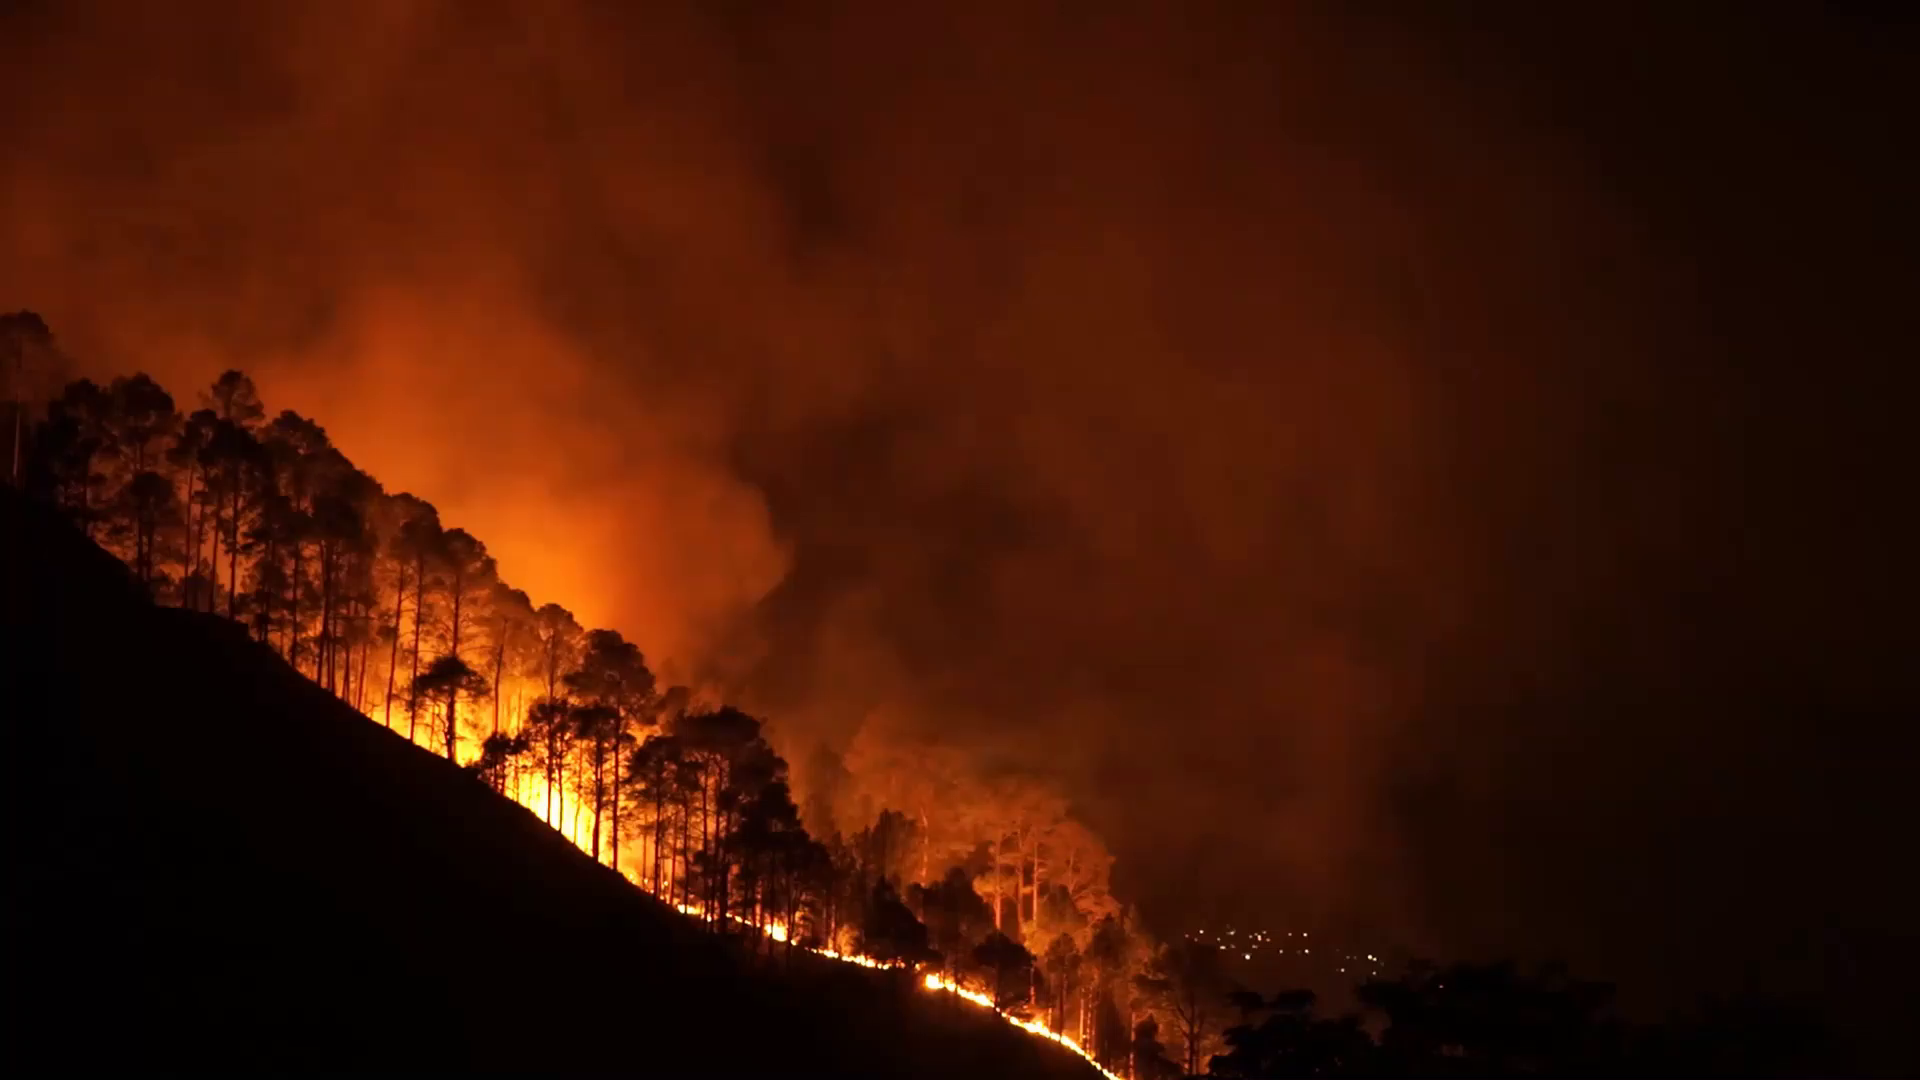

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)

In [ ]:
while (video.isOpened()):
  ret, frame = video.read()
  ret
  #if ret==0:
    #break
  if ret:
    cv2.imwrite("image.jpg",frame)
    img=tf.keras.utils.load_img("image.jpg",target_size=(128,128))
  
    x=tf.keras.utils.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    pred=model.predict(x)
    p=pred[0]
    print(pred)
  else:
    break

1/1 [==============================] - 0s 251ms/step
[[1.]]
1/1 [==============================] - 0s 55ms/step
[[1.]]
1/1 [==============================] - 0s 33ms/step
[[1.]]
1/1 [==============================] - 0s 26ms/step
[[1.]]
1/1 [==============================] - 0s 29ms/step
[[1.]]
1/1 [==============================] - 0s 25ms/step
[[1.]]
1/1 [==============================] - 0s 24ms/step
[[1.]]
1/1 [==============================] - 0s 35ms/step
[[1.]]
1/1 [==============================] - 0s 26ms/step
[[1.]]
1/1 [==============================] - 0s 26ms/step
[[1.]]
1/1 [==============================] - 0s 25ms/step
[[1.]]
1/1 [==============================] - 0s 25ms/step
[[1.]]
1/1 [==============================] - 0s 26ms/step
[[1.]]
1/1 [==============================] - 0s 25ms/step
[[1.]]
1/1 [==============================] - 0s 27ms/step
[[1.]]
1/1 [==============================] - 0s 29ms/step
[[1.]]
1/1 [==============================] - 0s 24ms/step
[[1

In [ ]:
from playsound import playsound

In [ ]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#playsound('"D:\Kruthi\BE_SEM VII\IBM Project\IBM\Alarm.mp3"')

PlaysoundException: ignored

In [ ]:
from pydub import AudioSegment
from pydub.playback import play
  
# for playing mp3 file
song = AudioSegment.from_mp3("Alarm.mp3")
print('playing sound using  pydub')
play(song)

playing sound using  pydub


In [ ]:
playsound('Alarm.mp3')

CalledProcessError: ignored

In [ ]:
pred = model.predict(x)
if pred[0]==1:
  account_sid = 'AC12ef9f733c3649941ba805aee56562a1'
  auth_token = 'fa1181691095d6353e4a349f489d6e91'
  client = Client(account_sid, auth_token)

  message = client.messages \
      .create(
          body='Forest fire is detected , stay alert',
          from_='+13467038066',
          to='+919150447026'
       )
  print(message.sid)
  print("SMS Sent!!!")
  playsound('D:\Kruthi\BE_SEM VII\IBM Project\IBM\Alarm.mp3')
else:
  print("No Danger")
  #cv2.imshow("image",frame)
  #if cv2.waitKey(1) & 0xFF==ord('a'):
    #break
#video.release()
#cv2.destroyAllWindows()

1/1 [==============================] - 0s 28ms/step
SM4dd06539e41f03185350715e621afbfb
SMS Sent!!!


In [ ]:
account_sid = 'AC2db133e57e1937888c6f1c40225db83c'
auth_token = '498a2d7ec3e27b76c1a1b427c59f8855'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+14793244441',
         to='+917358366539'
     )
    
message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+14793244441',
         to='+917358366539'
     )

print(message.sid)

SM1cd357009ef1b95b5e206c33b0c117b2
